<h1> <b> Análise de Cluster - Agrupamento Via K-means </b> </h1>

<h2>Importanto Bibliotecas</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

<h2> Leitura de dados </h2>

In [6]:
df=pd.read_excel('database.xlsx')
df.head()

,codigo,municipio,area,densidade,distancia,esp_vida,mortalidade,tx_fecundidade,analfabetismo_percet,renda_per_capita,...,tx_alfabetizacao,anos_estudo_25+,pop_25+_1991,pop_25+_2000,pop_65+_1991,pop_65+_2000,pop_total_1991,pop_total_2000,pop_urbana,pop_rural
0,520005,Abadia de Goiás (GO),136.9,36.3,21.414308,67.58,27.70,2.85,15.64,205.27,...,88.03,4.87,1872,2433,121,227,4227,4971,3096,1875
1,310010,Abadia dos Dourados (MG),897.4,7.2,390.876513,72.92,20.51,2.54,14.48,196.36,...,86.58,4.36,3308,3781,354,459,6492,6446,3927,2519
2,520010,Abadiânia (GO),1047.7,10.9,78.641435,69.59,22.36,2.77,21.81,168.31,...,82.45,4.24,4241,5918,446,686,9402,11452,7206,4246
3,150010,Abaetetuba (PA),1613.9,73.8,51.184552,70.77,25.61,3.15,24.85,102.14,...,80.74,4.28,33554,44897,3792,4688,99989,119152,70843,48309
4,310020,Abaeté (MG),1822.4,12.3,172.311549,72.50,21.59,2.41,15.56,253.68,...,87.55,4.78,10163,12406,1084,1595,20689,22360,19022,3338


In [7]:
df['%_crescimento'] = ((df['pop_total_2000']-df['pop_total_1991'])/df['pop_total_1991'])*100

Aplicando matriz de correlação para reduzir número de variáveis

In [8]:
numerical = df._get_numeric_data()
numerical.head()
correlation=numerical.corr()
correlation.to_csv('correlação.csv')

<h2> Exclusão de variavéis que não são de interesse </h2>

In [9]:
for column in df:
        print(column)

codigo
municipio
area
densidade
distancia
esp_vida
mortalidade
tx_fecundidade
analfabetismo_percet
renda_per_capita
in_gini
indigencia
intens_pobreza
idh
frequencia_escolar
tx_alfabetizacao
anos_estudo_25+
pop_25+_1991
pop_25+_2000
pop_65+_1991
pop_65+_2000
pop_total_1991
pop_total_2000
pop_urbana
pop_rural
%_crescimento


In [10]:
df=df.drop(columns=['area',
    'codigo',
    'esp_vida',
    'mortalidade',
    'tx_fecundidade',
    'analfabetismo_percet',
    'intens_pobreza',
    'idh',
    'frequencia_escolar',
    'tx_alfabetizacao',
    'anos_estudo_25+',
    'pop_25+_1991',
    'pop_25+_2000',
    'pop_65+_1991',
    'pop_65+_2000',
    'pop_total_1991',
    'pop_urbana',
    'pop_rural',
    'in_gini',
    'indigencia',
    'distancia'])

In [11]:
for column in df:
    print(column)

municipio
densidade
renda_per_capita
pop_total_2000
%_crescimento


<h2> Clusterização Hierarquica </h2>

<h3> Padronização dos dados </h3>

In [12]:
df.head()

,municipio,densidade,renda_per_capita,pop_total_2000,%_crescimento
0,Abadia de Goiás (GO),36.3,205.27,4971,17.601136
1,Abadia dos Dourados (MG),7.2,196.36,6446,-0.708564
2,Abadiânia (GO),10.9,168.31,11452,21.803872
3,Abaetetuba (PA),73.8,102.14,119152,19.165108
4,Abaeté (MG),12.3,253.68,22360,8.076756


In [13]:
df2=df.drop(columns=['municipio','%_crescimento'])
X=df2.to_numpy()


<h3> Definindo o número de clusters </h3>

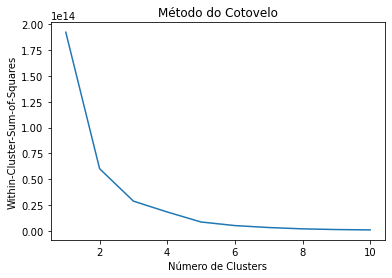

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

In [ ]:
n_k=int(input('O número de clusters escolhido foi: '))
kmeans = KMeans(n_clusters = n_k, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)


In [ ]:
df['Cluster'] = clusters
df.to_excel('classificação.xlsx')

<h1>Entrando com um novo dado</h1>

In [ ]:
import math
def verifica_classe2():
    ##converte o valor dos cluster que foram normalizados
    center=kmeans.cluster_centers_
    ##recebe os dados
    dens=float(input('Densidade: ',))
    renda=float(input('Renda per capita: ',))
    pop=float(input('População Total: ',))
    ##calcula a distância euclidiana dos dados até o centróide
    dist=[]
    for i in range (0,n_k-1,1): ##onde n_k é o número de clusters
        dist.append(math.sqrt(((dens-center[i,0])**2)+((renda-center[i,1])**2)+((pop-center[i,2])**2)))
    n_pos=dist.index(min(dist))
    ##classifica de acordo com a menor distância
    if (n_pos == 0):
        print ('Essa cidade pertence a classe 0')
    elif (n_pos == 1):
        print ('Essa cidade pertence a classe 1')
    else: 
        print ('Essa cidade pertence a classe 2')
    print(dist)
    dist=[]

In [ ]:
verifica_classe()

NameError: name 'git' is not defined